# Graduate Admission Analysis and Prediction
### submitted to : Mr. Upendra Singh
### Submitted by: Vishakha Deoda
### Department : School of Data Science and Forecasting
### Roll no. : DS5B-2138



![](https://learnrhome.files.wordpress.com/2019/05/graduate.png)

![](http://debarghyadas.com/writes/assets/grad-main.png)

### Purpose

To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.


So, basically this set is about the Graduate Admissions data i.e. Given a set of standardized scores like GRE, TOEFL, SOP standard scores, LOR standard scores, what is probability ( basically i have done a YES/NO scenario ) of gaining admission into a particular school. All those folks who are preparing for MS, might point out this question, from where did you get SOP & LOR scores. These aren’t public figures ? I mean yes, it might not be public, but dont you think universities might be grading these applications on some scale of rating so that the scores can be standardized. Hence the SOP, LOR scores.

### Dataset

This dataset is created for prediction of graduate admissions and the dataset link is below:

* Features in the dataset:

* GRE Scores (290 to 340)

* TOEFL Scores (92 to 120)

* University Rating (1 to 5)

* Statement of Purpose (1 to 5)

* Letter of Recommendation Strength (1 to 5)

* Undergraduate CGPA (6.8 to 9.92)

* Research Experience (0 or 1)

* Chance of Admit (0.34 to 0.97)

### Step1: Data Collection/ Data Extraction

#### Import Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
# Import Dataset
data = pd.read_csv("Admission_Predict.csv")
data.shape

(400, 9)

In [118]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [119]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [120]:
data.drop('Serial No.', axis=1, inplace=True)

In [121]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

### Step 2:  Data Analysis or Data Exploration

In [122]:
#Let's see top 10 observation row and column wise
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [123]:
# Let's see the detail information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [124]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

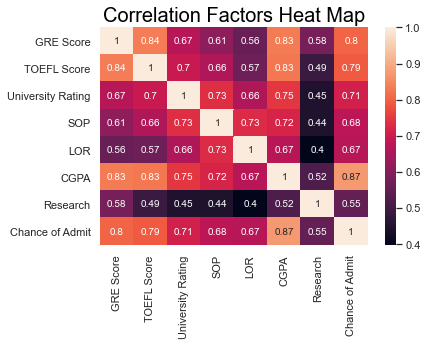

In [125]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

##### GRE Scores

The Graduate Record Examinations (GRE) is a the most popular test for graduate schools' admission, it consists of three sections : Analytical Writing, Verbal and Quantitative.

The test's maximum score is 340 and minimum is 260, and according to an official GRE score document, the mean test score for all individuals from July 1,2014 to June 30,2017 (almost 1,700,000 test taker) is 306.35 which rounds to 306 with an average standard deviation of 7.19

source: https://www.ets.org/s/gre/pdf/gre_interpreting_scores.pdf

In [126]:
# Isolating GRE Score data
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,400.000000
mean,316.807500
std,11.473646
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


The sample's GRE score mean is 316 which is a little bit higher than the mean mentioned previously (306)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


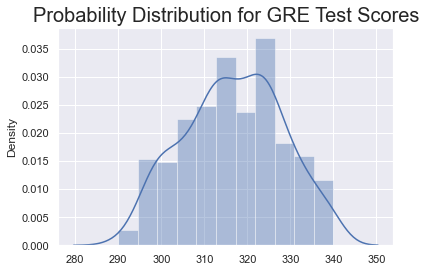

In [127]:
# # Probability Distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')
plt.show()

As the distribution plot shows, the GRE test scores are somehow normally distributed.

In [128]:
# Correlation Coeffecients for GRE Score Test
GRE_CORR = pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score', axis=0, inplace=True)
GRE_CORR.rename({'GRE Score': 'GRE Correlation Coeff'}, axis=1, inplace=True)
GRE_CORR

,GRE Correlation Coeff
TOEFL Score,0.835977
University Rating,0.668976
SOP,0.612831
LOR,0.557555
CGPA,0.833060
Research,0.580391
Chance of Admit,0.802610


##### TOEFL Score

Test of English as a Foreign Language (TOEFL) is a very popular test for English language amongst universities worldwide, it is marked based on three sections: Reading, Listening, Speaking, and Writing, each one of them is out of 30, yielding a maximum score of 120 and a minimum of 0.

ETS (the institute that offers the test) recorded a mean score of 82.6 with a standard deviation of 19.5 (https://www.ets.org/s/toefl/pdf/94227_unlweb.pdf).

Although this is the mean for a wide range of students from all around the world that took the test for different purposes, as students applying for an engineering graduate degree might have a higher average than high school students.

In [129]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(data['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,400.000000
mean,107.410000
std,6.069514
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


It's evident that the sample over performs in the TOEFL.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


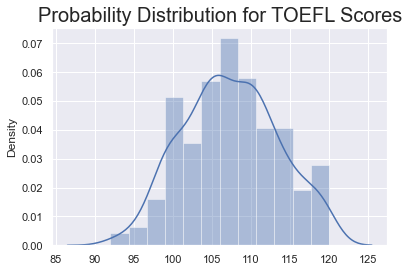

In [130]:
# Probability distribution for TOEFL Scores
sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='20')
plt.show()

##### CGPA
Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

In [131]:
# Isolating and describing the CGPA
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,400.000000
mean,8.598925
std,0.596317
min,6.800000
25%,8.170000
50%,8.610000
75%,9.062500
max,9.920000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


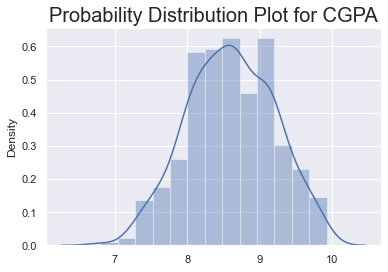

In [132]:
sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='20')
plt.show()

##### Research

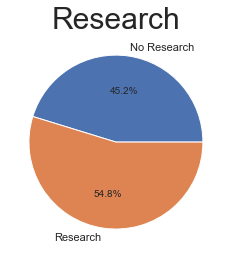

In [133]:
RES_Count = data.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

##### University Rating
The rating of the university the student completed his undergraduate degree from.

In [134]:
# Isolating and describing 
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,26
2,107
3,133
4,74
5,60


How good the university is a value between 1 and 5 in integer increment , and since it has positive correlation factors with other variables it's clear that 5 is the highest rating and 1 is the lowest.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


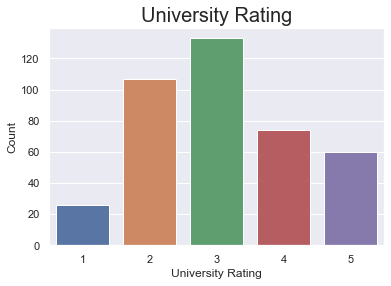

In [135]:
# Barplot for the distribution of the University Rating
sns.barplot(University_Rating.index, University_Rating['Count']).set_title('University Rating', size='20')
plt.show()

##### SOP
Statement of Purpose (SOP) is a letter written by the student himself to state his purpose and motivation for completing a graduate degree in addition to his goals while and after he completes his study. Many universities find this letter significant because it better describe the student from a personal perspective.

In [136]:
#Isolating and describing
SOP = pd.DataFrame(data.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,20
2.0,33
2.5,47
3.0,64
3.5,70
4.0,70
4.5,53
5.0,37


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


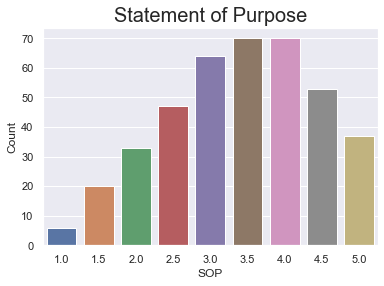

In [137]:
# Barplot for SOP 
sns.barplot(SOP.index, SOP['Count']).set_title('Statement of Purpose', size='20')
plt.show()

Exploring this variable, it's ordered from 1 to 5 with 0.5 increments, although the criteria for assessment isn't specified, which will make it harder to deal with new entries.

##### LOR
Letter of Recommendation (LOR) is a letter written by a person that knows the student and recommends that the university accept his admission, this person can be a professor in his undergraduate degree or a professional whom the student have worked with.

In [138]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,7
2.0,38
2.5,39
3.0,85
3.5,73
4.0,77
4.5,45
5.0,35


THE LOR is ordered same as the SOP

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


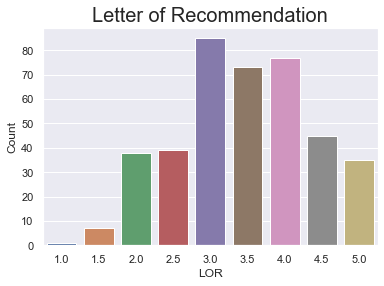

In [139]:
# Distribution of the LOR
sns.barplot(LOR.index, LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

Are students in this sample too good?

First looking at the students LOR, SOP and University Ratings, most students score (4-5) on the scales, not many scored (1-2.5).

Nonetheless, comparing means for their GRE and TOEFL scores, which are of a universal criteria, they clearly perform better than the average student as the ETS states.

To conclude, it seems only wise to consider the sample to be somehow above average.

##### Chance of Admission

Let's first take a review on the chances of admission.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


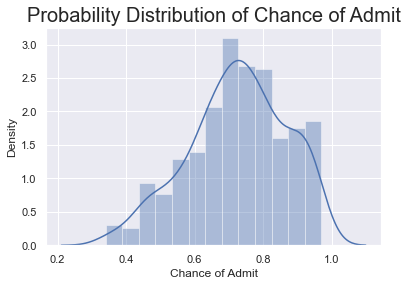

In [140]:
data['Chance of Admit']
sns.distplot(data['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')
plt.show()

In [141]:
data.describe()['Chance of Admit']

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit, dtype: float64

And since one of our goals is to predict the chance of admission, let's take a look on how the different variables correlate with it.

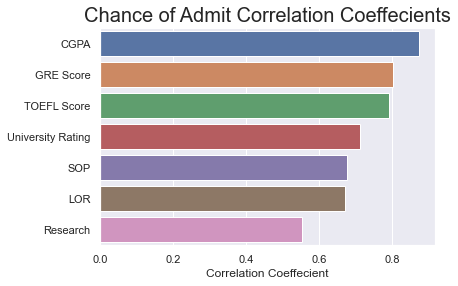

In [142]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score

In [143]:
COA_corr

,Correlation Coeffecient
CGPA,0.873289
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
Research,0.553202


## Prediction Models : Regression Algorithm (Supervised Machine Learning)

1. Linear Regression
2. Decision Tree
3. Random Forest

### Step 3: Train Algorithm

In [144]:
X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']

In [145]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CGPA','GRE Score', 'TOEFL Score']] = scaler.fit_transform(X[['CGPA','GRE Score', 'TOEFL Score']])

In [146]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [147]:
#### Linear Regression (All Features)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [149]:
lr = LinearRegression()

### Step4 : Test Algorithm

In [150]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [151]:
pd.DataFrame({"Actual": y_test, "Predict": y_test}).head()

,Actual,Predict
38,0.52,0.52
387,0.53,0.53
270,0.72,0.72
181,0.71,0.71
195,0.78,0.78


In [152]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.7582154534847563 
Linear Regression MSE: 0.004242341981774605, 
Linear Regression RMSE:0.06513326325138796


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


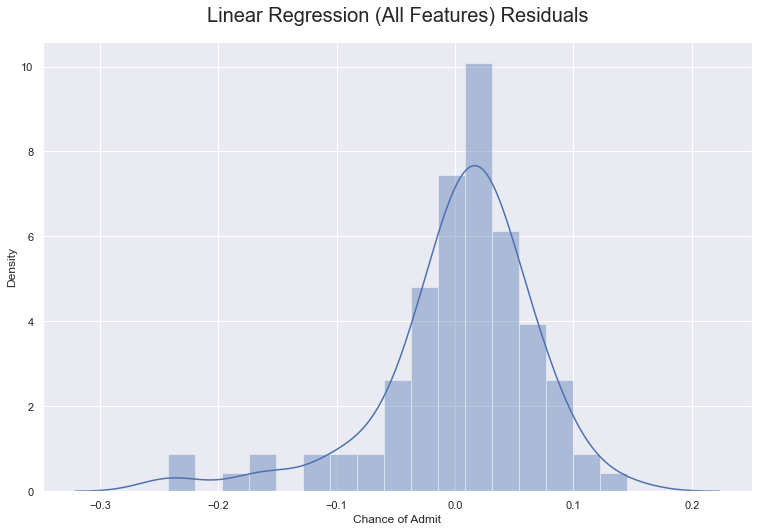

In [153]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test - y_pred))
plt.title('Linear Regression (All Features) Residuals', fontdict={'fontsize':20}, pad=20)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


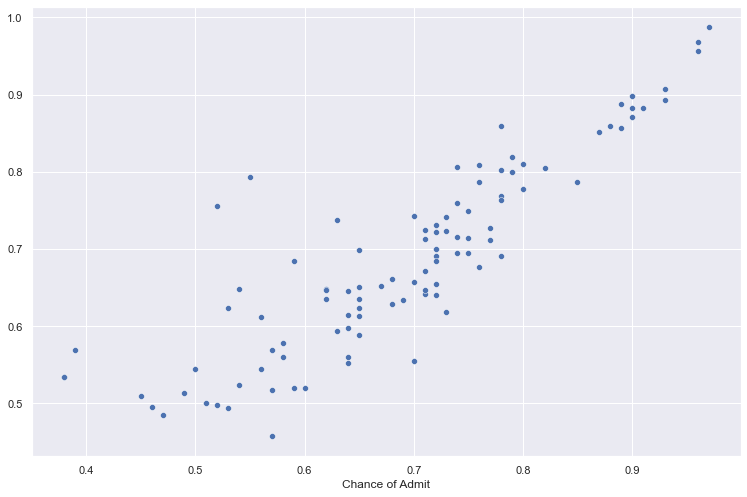

In [154]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
# sns.(y_test, y_pred)
sns.scatterplot(y_test, y_pred)
plt.show()

### Linear Regression (Selected Features)

In [155]:
X_selected = X[['CGPA', 'GRE Score', 'TOEFL Score']]
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_selected, y, random_state=101)

In [156]:
lr_sel = LinearRegression()
lr_sel.fit(X_sel_train, y_train)
lr_sel_predictions = lr_sel.predict(X_sel_test)

In [157]:
lr_sel_r2 = r2_score(y_test, lr_sel_predictions)
lr_sel_mse = mean_squared_error(y_test, lr_sel_predictions)
lr_sel_rmse = np.sqrt(lr_sel_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_sel_r2, lr_sel_mse, lr_sel_rmse))

Linear Regression R2 Score: 0.7268517110749728 
Linear Regression MSE: 0.0047926489515469715, 
Linear Regression RMSE:0.06922896035292579


### 2. Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(X_train,y_train)
y_head_rfr = rfr.predict(X_test) 

In [159]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_rfr))

r_square score:  0.7052483078725816


### 3. Decision Tree 

In [160]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test) 

In [161]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))

r_square score:  0.4154779789763571


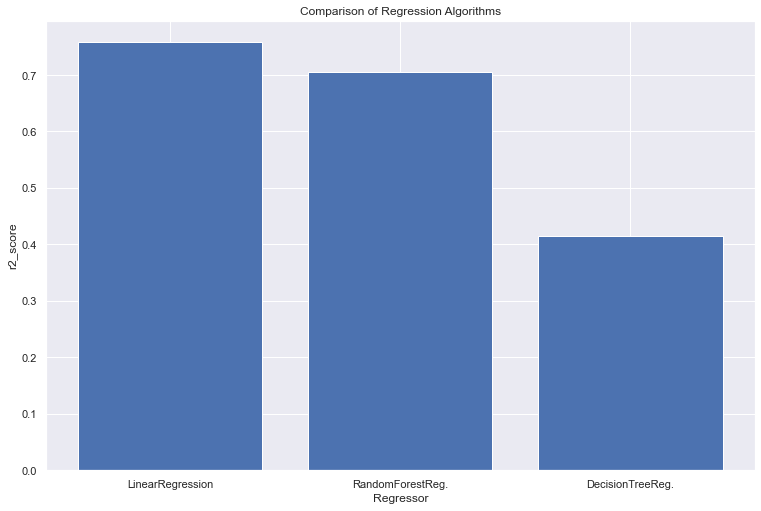

In [162]:
y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

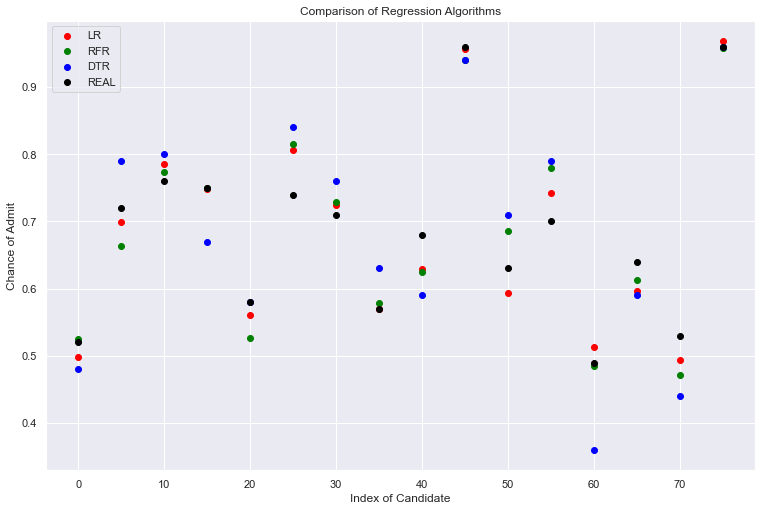

In [163]:
red = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

Comment:

Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted

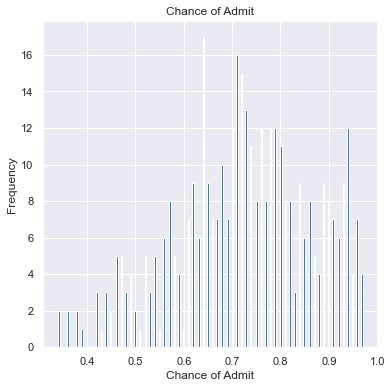

In [164]:
data["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()